# Molecular Structure and Color  


---

## Objectives:  
1. Explain how molecular structure (conjugation, π‑bonds) affects color.  
2. Relate photon energy and wavelength to observed color.  
3. Compute energy gaps to predict absorption wavelengths for real molecules.

## Setup 
First run this cell to install dependencies and enable widgets:

In [1]:
!pip install pyscf
!pip install rdkit
!pip install geometric
!pip install py3Dmol
!pip install matplotlib

import os
import sys
import pyscf
import py3Dmol
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import random

from pyscf.hessian import thermo
from pyscf import gto, scf, dft, tools, lo
from pyscf.geomopt.geometric_solver import optimize

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolToImage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geometric: filename=geometric-1.1-py3-none-any.whl size=402087 sha256=22d0b6a1781f22f7d88c5bdee1b8b79841a8f7b0c25bd1849c699de1fff61615
  Stored in directory: /root/.cache/pip/wheels/c5/77/0c/96a54539fe0560749fdbe283f92582d09bddb212856407a4cb
Successfully built geometric


# Introduction to the Chemistry of Color

---



## What is Color?
Color is the way our eyes and brain work together to see different parts of light. Light is made up of many different colors mixed together, which we can see in a rainbow. Each color in the rainbow, like red, blue, and green, is a different type of light with its own unique energy.
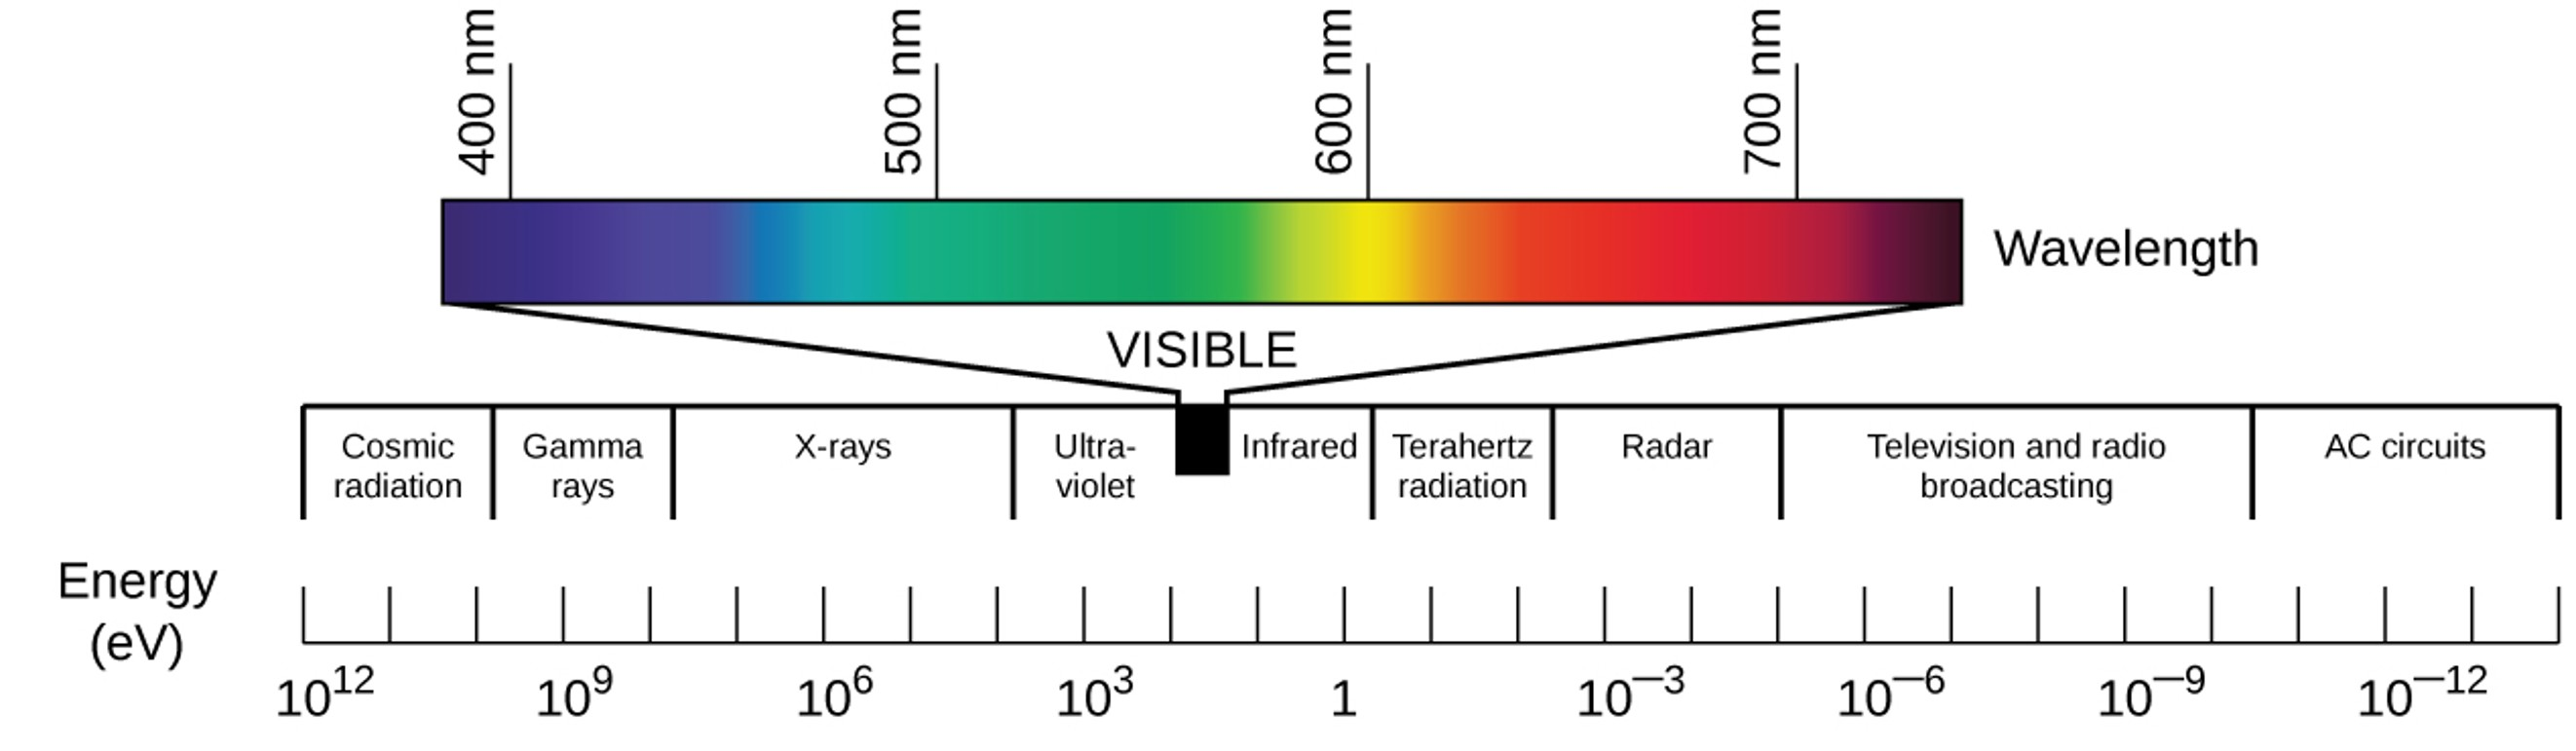
*image url: https://commons.wikimedia.org/wiki/File:OSC_Microbio_02_01_Emspectrum.jpg*

### How does chemical structure affect color?
The color of light we perceive from a chemical depends on its structure because the structure determines how the chemical interacts with light. Here's a simple way to understand this:

**Atoms and Molecules:** Everything is made up of tiny particles called atoms, and atoms can join together to form molecules. Different arrangements of atoms in a molecule can affect its color.

**Absorption of Light:** When light hits a molecule, certain colors (wavelengths) of light have just the right amount of energy to be absorbed by specific molecules in an object. Therefore we call this process absorption.

**Reflection:** The colors that aren't absorbed get reflected or pass through the molecule. These are the colors we see. If a molecule absorbs blue light, for instance, it might reflect or transmit red light, so we see the object as red.

**Emission:** Sometimes light that is absorbed by the molecule is high enough energy that the molecule cannot hold onto it so it is emitted back out as light. Unlike reflection we see the actual color of the light emitted.

**Chemical Structure:** The specific arrangement of atoms and the types of bonds between them in a molecule determine which wavelengths of light the molecule absorbs. This is why different chemicals have different colors. For example, chlorophyll in plants absorbs red and blue light, making plants look green because they reflect green light.

So, the chemical structure changes the color of light we perceive because it dictates which colors of light are absorbed and which are reflected or emitted. This is why a small change in the structure of a molecule can lead to a big change in its color.

## Color in organic materials
### What Are Pi Bonds and Conjugation?

1. **Atoms and Bonds**: Imagine atoms as tiny building blocks that connect to form molecules. In organic molecules, carbon atoms can share electrons (tiny particles) with other carbon atoms or different kinds of atoms. These shared electrons create **bonds**.

2. **Pi Bonds**: Some bonds between carbon atoms are special and are called **pi bonds**. Think of pi bonds as extra links above and below the main connection between two carbon atoms, like having an extra layer of glue holding two blocks together.

3. **Conjugation**: When we have multiple pi or double bonds in a row (represented by two parallel lines), we get **conjugation**. This is like having a series of connected blocks with extra glue between each pair, allowing for stronger and more flexible connections. These shared pi bonds create a system where electrons can move more freely across several atoms.

### How Conjugation Affects Color

1. **Electron Movement**: In a conjugated system, electrons can move more freely over the connected pi bonds. Imagine the electrons as beads on a string that can slide back and forth easily along the string. This movement of electrons affects how the molecule interacts with light.

2. **Absorption of Light**: When light hits a molecule, the energy from the light can excite these freely moving electrons, making them jump to a higher energy level. The specific energy (or color) of light that gets absorbed depends on how easy it is for the electrons to move within the conjugated system.

3. **Visible Colors**: The colors we see are the ones that are **not absorbed**. For example, if a molecule absorbs blue light, it might reflect red and yellow, making the material look orange.

### Examples in Nature

1. **Carrots**: Carrots are orange because they contain a molecule called **beta-carotene**. This molecule has a long chain of conjugated pi bonds. The electrons in this chain absorb blue and green light, so the carrot reflects red and yellow light, which combine to look orange to our eyes.

2. **Flowers**: Many flowers get their colors from molecules with conjugated pi bonds. For example, the red color in roses comes from molecules called anthocyanins, which have conjugated systems that absorb certain wavelengths of light and reflect red.

### Summary

So, in organic materials, the color we see is connected to the presence of conjugated pi bonds. These bonds allow electrons to move more freely across the molecule, affecting how the molecule absorbs and reflects light. The specific arrangement of these bonds determines the color we perceive, which is why different organic materials can be so colorful and beautiful.

# Determining Color Using Calculations
There are several different types of sofware for running quantum chemical computations. Some are free and open-source; some are not. For today, exercises, we will be usin [PySCF](https://pyscf.org/), a free open-source software for computational chemistry.

Using this software we will look at differnt organic materials and begin to find trends connecting the structure of molecules and their color.

## Prep Calculations

#### Making Molecules
To build your molecule, we will convert a string of characters called a `smiles` string into a molecular structure. We will start by looking at the molecule ethene which consists of two carbon molecules connected by a double bond. The code below will build your molecule and show its 2D and 3D representations.

# Build your molecule
The smiles text for ethene is "C=C" where the "C" represents carbon atoms and "=" represents a double bond. Run this cell to build the structure of ethene and see the 2D structure below.


Your smiles:  C=C 

2D Structure:


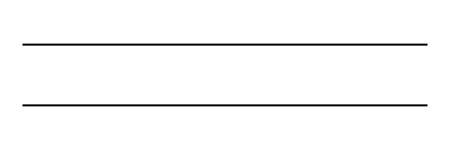

In [2]:
smiles = "C=C"
molecule_name = 'ethene'
#drawing_style = "carton" #@param ['stick', 'sphere', 'line','carton']
print("Your smiles: ", smiles, "\n\n2D Structure:")

# Establish RDKit mol object
rd_mol = Chem.MolFromSmiles(smiles)
rdmol_hs = Chem.rdmolops.AddHs(rd_mol)
AllChem.EmbedMolecule(rdmol_hs)
Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))

rd_mol

Run the next cell to view the moleucle in 3D

In [3]:
v = py3Dmol.view()
v.addModel(Chem.MolToMolBlock(rd_mol), 'mol')
v.setStyle({'stick':{}})
v.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### ENERGY
Energy calculations extract the energy of the molecule and provide the energy of the energy gap which is responsible for the color you see.

Run the next cell to get the energy of ethene and its energy gap.

In [4]:
def read_xyz(file_path):
    """Reads an XYZ file and returns the atomic coordinates as a string."""
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # Ignore the first two lines (atom count and comment)
    return ''.join(lines[2:])

def main():
    # Step 1: Read the .xyz file
    xyz_file = F'{molecule_name}_optimization.xyz'
    atomic_coords = read_xyz(xyz_file)

    # Step 2: Set up the molecule
    mol = gto.M(
        atom=atomic_coords,
        basis='6-31G'
    )

    # Step 3: Run the SCF calculation
    mf = scf.RHF(mol)
    mf.kernel()

    # Step 4: Extract the HOMO and LUMO energies
    mo_energies = mf.mo_energy
    homo_idx = mol.nelectron // 2 - 1
    lumo_idx = homo_idx + 1
    homo_energy = mo_energies[homo_idx]
    lumo_energy = mo_energies[lumo_idx]
    energy_gap = lumo_energy - homo_energy
    energy_gap_eV = round(energy_gap * 27.2114,2)

#    print(f'HOMO energy: {homo_energy:.6f} Hartree')
#    print(f'LUMO energy: {lumo_energy:.6f} Hartree')
    print(f'Energy gap: {energy_gap_eV:.6f} eV')
    return energy_gap_eV

if __name__ == '__main__':
    energy1 = main()

FileNotFoundError: [Errno 2] No such file or directory: 'ethene_optimization.xyz'

### Adding a Double Bond
Great! Now that you have optimized and calculated the energy gap for ethene we will now do the same for butadiene.

The smiles text for butadiene is "C=CC=C". Like ethene, the molecule is made up of carbon atoms, but this structure has two double bonds and one single bond. Run this cell to build the structure of ethene and see the 2D structure below.


In [ ]:
smiles = "C=CC=C"
molecule_name = 'butadiene'
#drawing_style = "carton" #@param ['stick', 'sphere', 'line','carton']
print("Your smiles: ", smiles, "\n\n2D Structure:")

# Establish RDKit mol object
rd_mol = Chem.MolFromSmiles(smiles)
rdmol_hs = Chem.rdmolops.AddHs(rd_mol)
AllChem.EmbedMolecule(rdmol_hs)
Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))

rd_mol

Run the next cell to see the structure in 3D.

In [ ]:
v = py3Dmol.view()
v.addModel(Chem.MolToMolBlock(rd_mol), 'mol')
v.setStyle({'stick':{}})
v.show()

Run the next cell to calculate the energy for butadiene.

In [ ]:
def read_xyz(file_path):
    """Reads an XYZ file and returns the atomic coordinates as a string."""
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # Ignore the first two lines (atom count and comment)
    return ''.join(lines[2:])

def main():
    # Step 1: Read the .xyz file
    xyz_file = F'butadiene_optimization.xyz'
    atomic_coords = read_xyz(xyz_file)

    # Step 2: Set up the molecule
    mol = gto.M(
        atom=atomic_coords,
        basis='6-31G'
    )

    # Step 3: Run the SCF calculation
    mf = scf.RHF(mol)
    mf.kernel()

    # Step 4: Extract the HOMO and LUMO energies
    mo_energies = mf.mo_energy
    homo_idx = mol.nelectron // 2 - 1
    lumo_idx = homo_idx + 1
    homo_energy = mo_energies[homo_idx]
    lumo_energy = mo_energies[lumo_idx]
    energy_gap = lumo_energy - homo_energy
    energy_gap_eV = round(energy_gap * 27.2114,2)

#    print(f'HOMO energy: {homo_energy:.6f} Hartree')
#    print(f'LUMO energy: {lumo_energy:.6f} Hartree')
    print(f'Energy gap: {energy_gap_eV:.6f} eV')
    return energy_gap_eV

if __name__ == '__main__':
    energy2 = main()

## Hexatriene
The last molecule we will be doing calculations for is hexatriene.

The smiles text for hexatriene is "C=CC=CC=C". This structure contains three double bonds. Run this cell to build the structure of ethene and see the 2D structure below.


In [ ]:
smiles = "C=CC=CC=C"
molecule_name = 'hexatriene'
#drawing_style = "carton" #@param ['stick', 'sphere', 'line','carton']
print("Your smiles: ", smiles, "\n\n2D Structure:")

# Establish RDKit mol object
rd_mol = Chem.MolFromSmiles(smiles)
rdmol_hs = Chem.rdmolops.AddHs(rd_mol)
AllChem.EmbedMolecule(rdmol_hs)
Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))

rd_mol

Run the next cell to see the 3D structure.

In [ ]:
v = py3Dmol.view()
v.addModel(Chem.MolToMolBlock(rd_mol), 'mol')
v.setStyle({'stick':{}})
v.show()

Run the next cell to calculate the energy and energy gap for hexatriene.

In [ ]:
def read_xyz(file_path):
    """Reads an XYZ file and returns the atomic coordinates as a string."""
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # Ignore the first two lines (atom count and comment)
    return ''.join(lines[2:])

def main():
    # Step 1: Read the .xyz file
    xyz_file = F'{molecule_name}_optimization.xyz'
    atomic_coords = read_xyz(xyz_file)

    # Step 2: Set up the molecule
    mol = gto.M(
        atom=atomic_coords,
        basis='6-31G'
    )

    # Step 3: Run the SCF calculation
    mf = scf.RHF(mol)
    mf.kernel()

    # Step 4: Extract the HOMO and LUMO energies
    mo_energies = mf.mo_energy
    homo_idx = mol.nelectron // 2 - 1
    lumo_idx = homo_idx + 1
    homo_energy = mo_energies[homo_idx]
    lumo_energy = mo_energies[lumo_idx]
    energy_gap = lumo_energy - homo_energy
    energy_gap_eV = round(energy_gap * 27.2114,2)

#    print(f'HOMO energy: {homo_energy:.6f} Hartree')
#    print(f'LUMO energy: {lumo_energy:.6f} Hartree')
    print(f'Energy gap: {energy_gap_eV:.6f} eV')
    return energy_gap_eV

if __name__ == '__main__':
    energy3 = main()


# Putting it all together!

## Energy vs Number of Double Bonds
There is a linear relationship between the energy gap of a molecule and the inverse of the number of double bonds. Using this relationship, we can predict the color of molecules with different numbers of double bonds.

In [ ]:
# Define the three points

x = np.array([1, 1/2, 1/3])
y = np.array([energy1, energy2, energy3])

# Fit a line to the points
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Create values for the trendline
x_fit = np.linspace(min(x), max(x), 100)
y_fit = trendline(x_fit)

# Plot the points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the trendline
plt.plot(x_fit, y_fit, color='red', label='Trendline')

# Annotate the equation of the line
equation_text = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
plt.text(0, 16, equation_text, fontsize=12, color='red')

# Add labels and title
plt.xlabel('1/# of Double Bonds')
plt.ylabel('Energy (eV)')
#plt.title('Plot of Points with Trendline')
#plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Interactive Slider: Conjugation Length vs. Color  
Color and energy are related by the following expression:

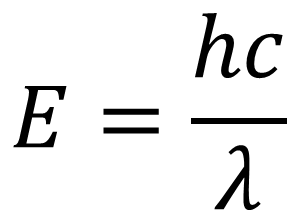

The constant h is Planck's constant and c is the speed of light. E is the energy of the light and λ is the color. At the very bottom of this notebook are a couple of calculators to convert between energy and wavelength so do not worry about doing calculations by hand.

Use the slider to see how adding conjugated π‑bonds shifts λ (wavelength) and color.

In [ ]:
def wavelength_to_color(wl):
    if wl < 450: return 'Violet'
    elif wl < 500: return 'Blue'
    elif wl < 570: return 'Green'
    elif wl < 590: return 'Yellow'
    elif wl < 620: return 'Orange'
    else: return 'Red'

def draw_conjugated(n):
    if n==1:
      smiles = 'C=' + 'C'
    else:
      smiles = 'C=' + 'C' + ('C=C' * (n-1))
    mol = Chem.MolFromSmiles(smiles)
    img = MolToImage(mol, size=(200,100))
    display(img)
    wavelength = 200 + 50 * n  # illustrative only
    color = wavelength_to_color(wavelength)
    display(f'Predicted λ = {wavelength} nm → {color}')

slider = widgets.IntSlider(value=2, min=1, max=8, description='Double Bonds')
widgets.interact(draw_conjugated, n=slider)

### Molecular Detective  
For each clue, select the correct pigment. Practice counting the number of double bonds!
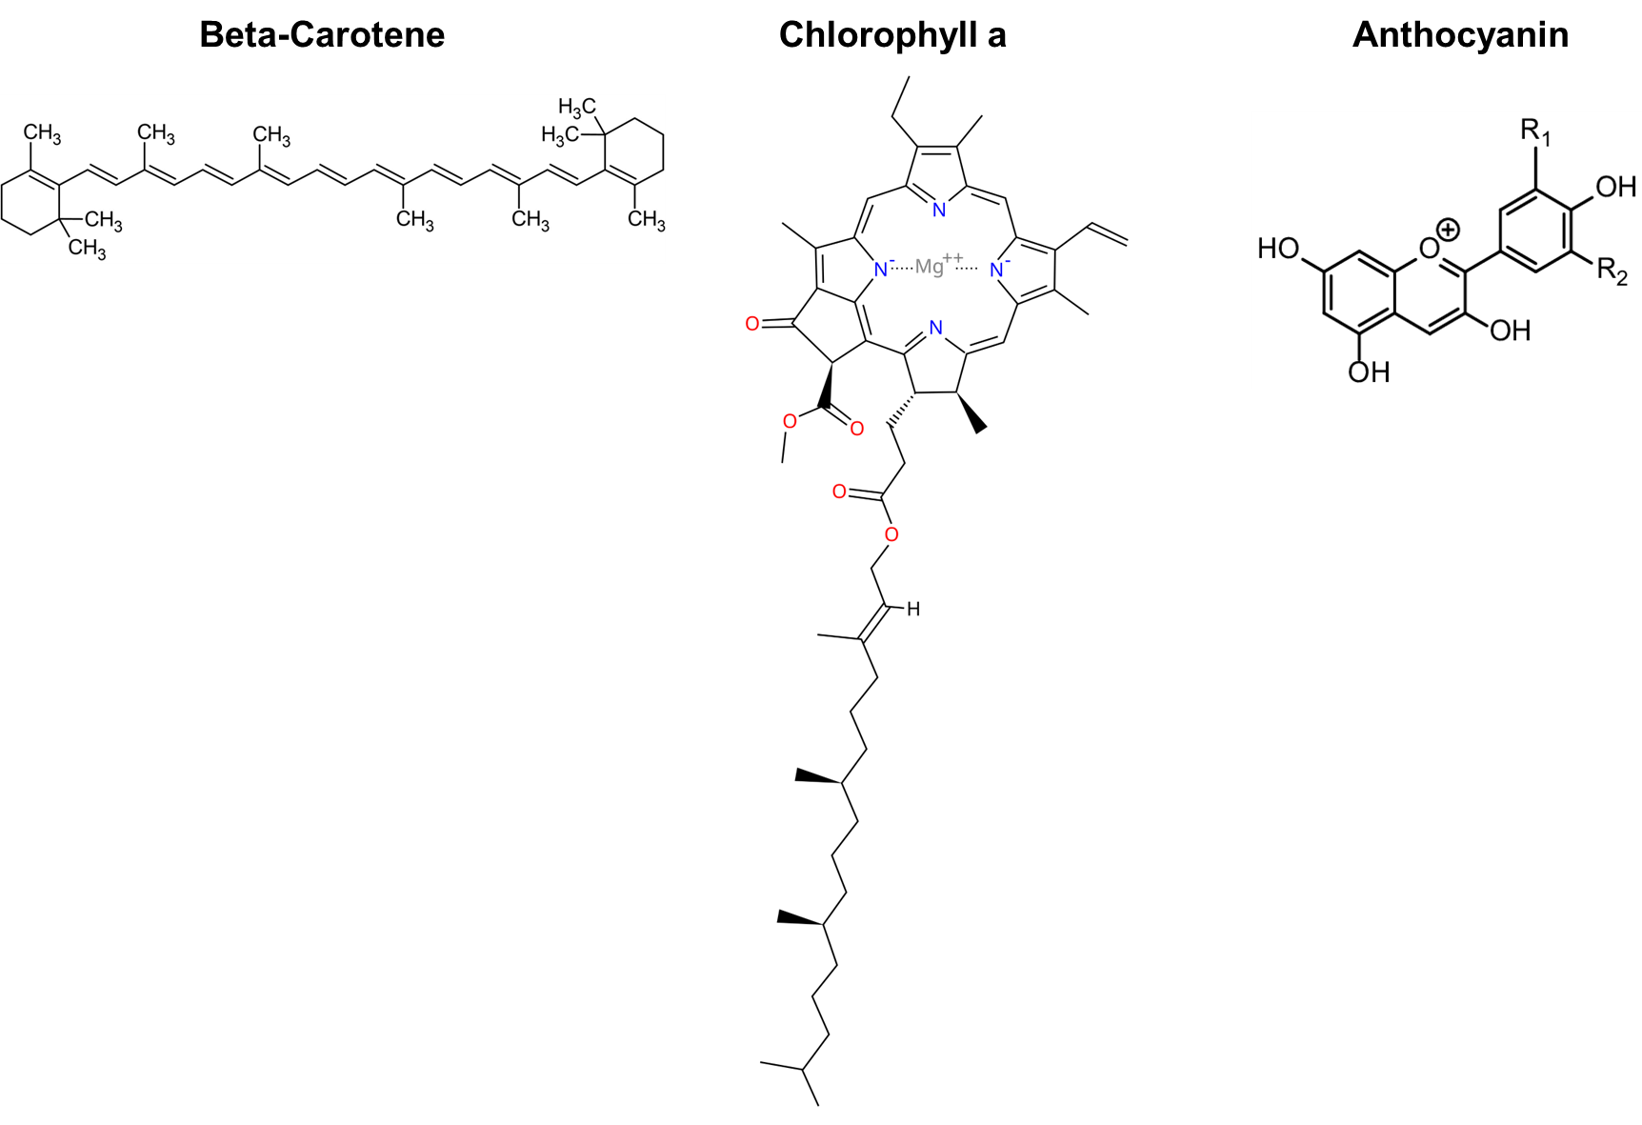

In [ ]:
# Clues & answers
questions = [
    {'clue':'11 double bonds; colors carrots orange.','answer':'Beta-Carotene'},
    {'clue':'15 double bonds; reflects green in leaves.','answer':'Chlorophyll a'},
    {'clue':'8 double bonds; flavonoid giving grapes/berries red-purple hue.','answer':'Anthocyanin'}
]
options_master = ['Beta-Carotene','Chlorophyll a','Anthocyanin']

dropdowns = []
for i, q in enumerate(questions, 1):
    display(f"Clue {i}: {q['clue']}")
    opts = random.sample(options_master, 3)
    dd = widgets.Dropdown(options=opts, description='Molecule:')
    out = widgets.Output()
    dropdowns.append((dd, q['answer'], out))
    display(dd, out)

submit = widgets.Button(description='Check All')

def on_click(b):
    for dd, ans, out in dropdowns:
        with out:
            out.clear_output()
            print('Correct!' if dd.value == ans else f'Incorrect (Answer: {ans})')
submit.on_click(on_click)
display(submit)

### Matching Game: Molecule ↔ Color  
Match each pigment to its observed color and real‑world application. Remember the trend between color and number of double bonds!
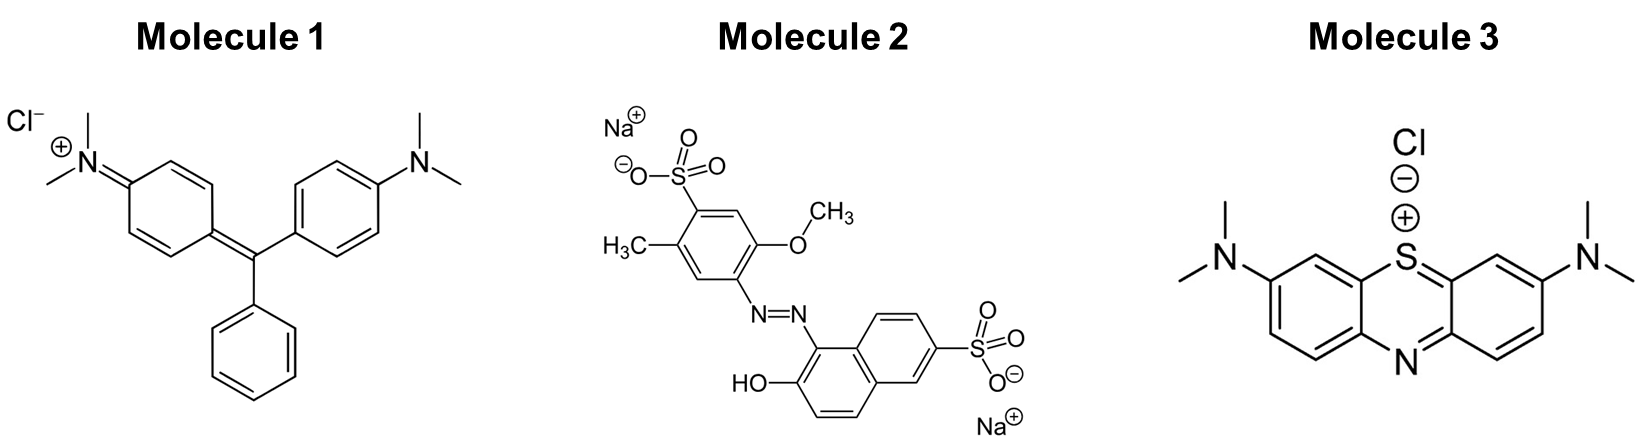

In [ ]:
import random
# Pigment data
molecules = {
    'Molecule 1': 'Green',
    'Molecule 2': 'Red',
    'Molecule 3': 'Blue',
}
real_world = {
    'Molecule 1': 'used as an antimicrobial in aquaculture (Malachite Green)',
    'Molecule 2': 'found commonly as a dye in food (Red 40)',
    'Molecule 3': 'used in microscopy stains (Methylene Blue)'
}

colors = list(set(molecules.values()))
dropdowns = []
for color in colors:
    opts = list(molecules.keys())
    random.shuffle(opts)
    dd = widgets.Dropdown(options=opts, description=color)
    dropdowns.append((dd, color))

submit = widgets.Button(description='Check Answers')
output = widgets.Output()

def check(b):
    with output:
        output.clear_output()
        for dd, color in dropdowns:
            choice = dd.value
            correct = [mol for mol, col in molecules.items() if col == color]
            if choice in correct:
                print(f'{color}: {choice} ✔️ — {choice} {real_world[choice]}')
            else:
                print(f'{color}: {choice} ❌ (Expected one of {correct})')

submit.on_click(check)
display(*[dd for dd,_ in dropdowns], submit, output)

### Quiz: Photon Energy & Wavelength  
Test your understanding. Remember that calculators can be found at the end of the notebook and the visible spectrum with wavelengths of colors can be found in the introduction.

In [ ]:
# Quiz questions
questions = [
    {'prompt':'λ=700 nm corresponds to:','options':['Blue','Green','Red','Violet'],'answer':'Red'},
    {'prompt':'Highest energy wavelength:','options':['450 nm','550 nm','650 nm'],'answer':'450 nm'},
    {'prompt':'Absorption at 520 nm makes molecule appear:','options':['Green','Yellow','Orange'],'answer':'Green'}
]

widgets_list = []
for q in questions:
    display(q['prompt'])
    opts = q['options'][:]
    random.shuffle(opts)
    rb = widgets.RadioButtons(options=opts, description='')
    widgets_list.append((rb, q['answer']))
    display(rb)

submit = widgets.Button(description='Submit Quiz')
output = widgets.Output()
def grade_q(b):
    with output:
        output.clear_output()
        score = sum(1 for rb, ans in widgets_list if rb.value == ans)
        print(f'Score: {score}/{len(widgets_list)}')
submit.on_click(grade_q)
display(submit, output)

This module was developed as part of grant received from the National Science Foundation, Award Number 1905734.


Copyright 2025-2026, University of Kentucky

Designed by Megan Brown and Nolan Lok

# Calculators
### Energy (eV) to Wavelength (nm)

In [ ]:
# Converts energy in electron volts to wavelength in nanometers
energy_ev = float(input("Enter your energy in electron volts:\n"))
h = 6.626*10**-34 # m^2*kg/s
c = 2.998*10**8 # m/s
energy_j = energy_ev*(1.602*10**-19)
lambda_m = (h*c)/energy_j
lambda_nm = round(lambda_m * 1*10**9,2)
print(f"Wavelength = {lambda_nm} nm")

### Wavelength to Energy

In [ ]:
# Converts wavelength in nanometers to energy in electron volts
lambda_nm = float(input("Enter your wavelength in nanometers:\n"))
h = 6.626*10**-34 # m^2*kg/s
c = 2.998*10**8 # m/s
lambda_m = lambda_nm*10**-9
energy_j = (h*c)/lambda_m
energy_ev = round(energy_j*6.242*10**18,2)
print(f"Energy = {energy_ev} eV")